<div>
<img img class="logo" src="https://medialib.cmcdn.dk/medialibrary/51432DDB-BBE3-4327-85F4-BE3493077470/1D874B35-F493-EC11-84B2-00155D0B0901.png" style="width: 100px;" align="right">
</div>

# <center> Customer Churn Analysis

### <center> KAN-CDSCV1008U  Applied Machine Learning and Data Engineering in Business Context

### Data Preprocessing 

In [14]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [15]:
#importing training and testing dataset
train = pd.read_csv("customer_churn_dataset-training-master.csv")
test = pd.read_csv("customer_churn_dataset-testing-master.csv")

# Combinding the datasets 
df = pd.concat([train, test])

In [16]:
#initial inspection 
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [17]:
#figure out how many different values are in the categorical variables
unique_gender = df["Gender"].unique()
print("Unique values in Gender column:", unique_gender)

unique_subtype = df["Subscription Type"].unique()
print("Unique values in Subscription Type column:", unique_subtype)

unique_contractLenght = df["Contract Length"].unique()
print("Unique values in Contract Length column:", unique_contractLenght)

Unique values in Gender column: ['Female' 'Male' nan]
Unique values in Subscription Type column: ['Standard' 'Basic' 'Premium' nan]
Unique values in Contract Length column: ['Annual' 'Monthly' 'Quarterly' nan]


In [18]:
print('================== Complete Data ==================')
print(df.info())

================== Complete Data ==================
<class 'pandas.core.frame.DataFrame'>
Int64Index: 505207 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 50.1+ MB
None


In [19]:
#checking for missing values
print('==== Complete Data ====')
print(df.isna().sum())

==== Complete Data ====
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [20]:
#only one missing value, therefore, it is deemed as sufficient to remove this for handling missing values 
#drop missing values
train.dropna(inplace=True)
test.dropna(inplace=True)
df.dropna(inplace=True)

In [21]:
# Dropping 'CustomerID'
# This variable does not yield any importance for our purpose
df.drop(columns='CustomerID', inplace=True)
train.drop(columns='CustomerID', inplace=True)
test.drop(columns='CustomerID', inplace=True)

Since we have multiple categorical variables, we will create dummy variables for these, possibly just do label encoding (still figuring out which is best)

In [10]:
#creating dummy variables for the categorical variables
#complete dataset
df = pd.get_dummies(df, columns=['Subscription Type'], prefix='Subscription Type')
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender')
df = pd.get_dummies(df, columns=['Contract Length'], prefix='Contract Length')

#train set
train = pd.get_dummies(train, columns=['Subscription Type'], prefix='Subscription Type')
train = pd.get_dummies(train, columns=['Gender'], prefix='Gender')
train = pd.get_dummies(train, columns=['Contract Length'], prefix='Contract Length')

#test set
test = pd.get_dummies(test, columns=['Subscription Type'], prefix='Subscription Type')
test = pd.get_dummies(test, columns=['Gender'], prefix='Gender')
test = pd.get_dummies(test, columns=['Contract Length'], prefix='Contract Length')

In [24]:
#label encoding 
labelencoder = LabelEncoder()

#complete dataset
df["Gender"] = labelencoder.fit_transform(df["Gender"])
df["Subscription Type"] = labelencoder.fit_transform(df["Subscription Type"])
df["Contract Length"] = labelencoder.fit_transform(df["Contract Length"])


#train set 
train["Gender"] = labelencoder.fit_transform(train["Gender"])
train["Subscription Type"] = labelencoder.fit_transform(train["Subscription Type"])
train["Contract Length"] = labelencoder.fit_transform(train["Contract Length"])

#test set
test["Gender"] = labelencoder.fit_transform(test["Gender"])
test["Subscription Type"] = labelencoder.fit_transform(test["Subscription Type"])
test["Contract Length"] = labelencoder.fit_transform(test["Contract Length"])

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Gender'}>,
        <AxesSubplot: title={'center': 'Tenure'}>],
       [<AxesSubplot: title={'center': 'Usage Frequency'}>,
        <AxesSubplot: title={'center': 'Support Calls'}>,
        <AxesSubplot: title={'center': 'Payment Delay'}>],
       [<AxesSubplot: title={'center': 'Subscription Type'}>,
        <AxesSubplot: title={'center': 'Contract Length'}>,
        <AxesSubplot: title={'center': 'Total Spend'}>],
       [<AxesSubplot: title={'center': 'Last Interaction'}>,
        <AxesSubplot: title={'center': 'Churn'}>, <AxesSubplot: >]],
      dtype=object)

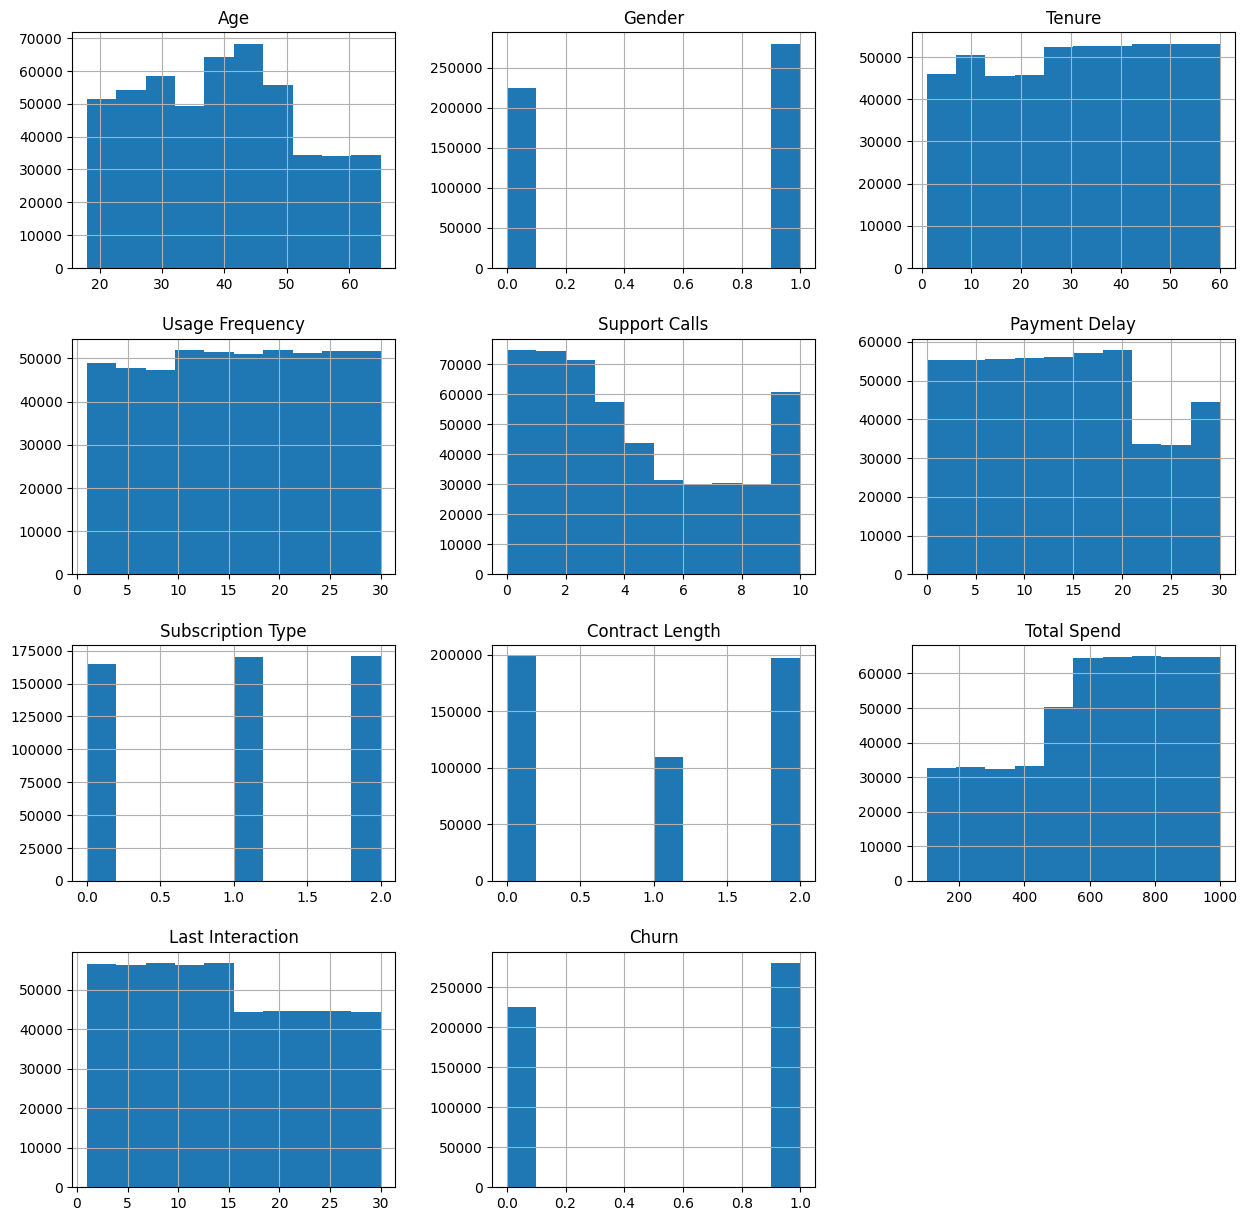

In [26]:
# Distribution with historgrams 
df.hist(bins=10, figsize=(15,15))

The Chrun Rate for XYZ Bank is: 55.52%


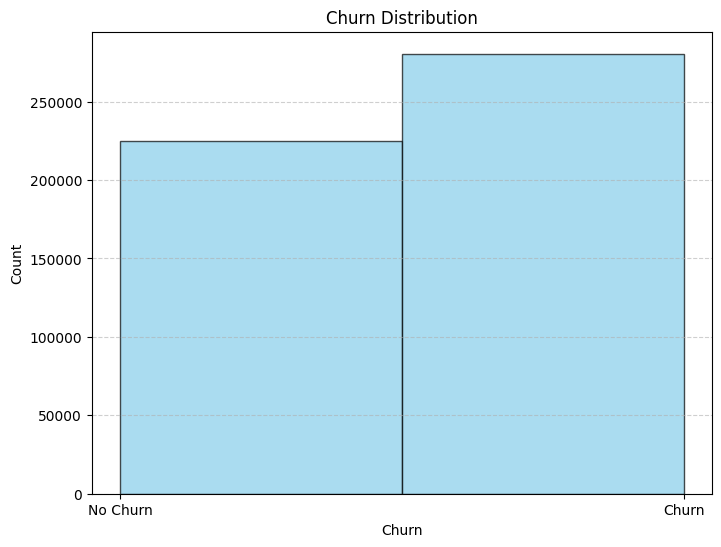

In [42]:
#churn rate
churn = (sum(df['Churn'])/len(df['Churn'].index))*100
print('The Chrun Rate for XYZ Bank is: {:.2f}%'.format(churn))

#churn distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Churn'], bins=2, color=['skyblue'], edgecolor='black', alpha=0.7)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Churn', 'Churn'])  # Assuming 0 represents No Churn and 1 represents Churn
plt.title('Churn Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

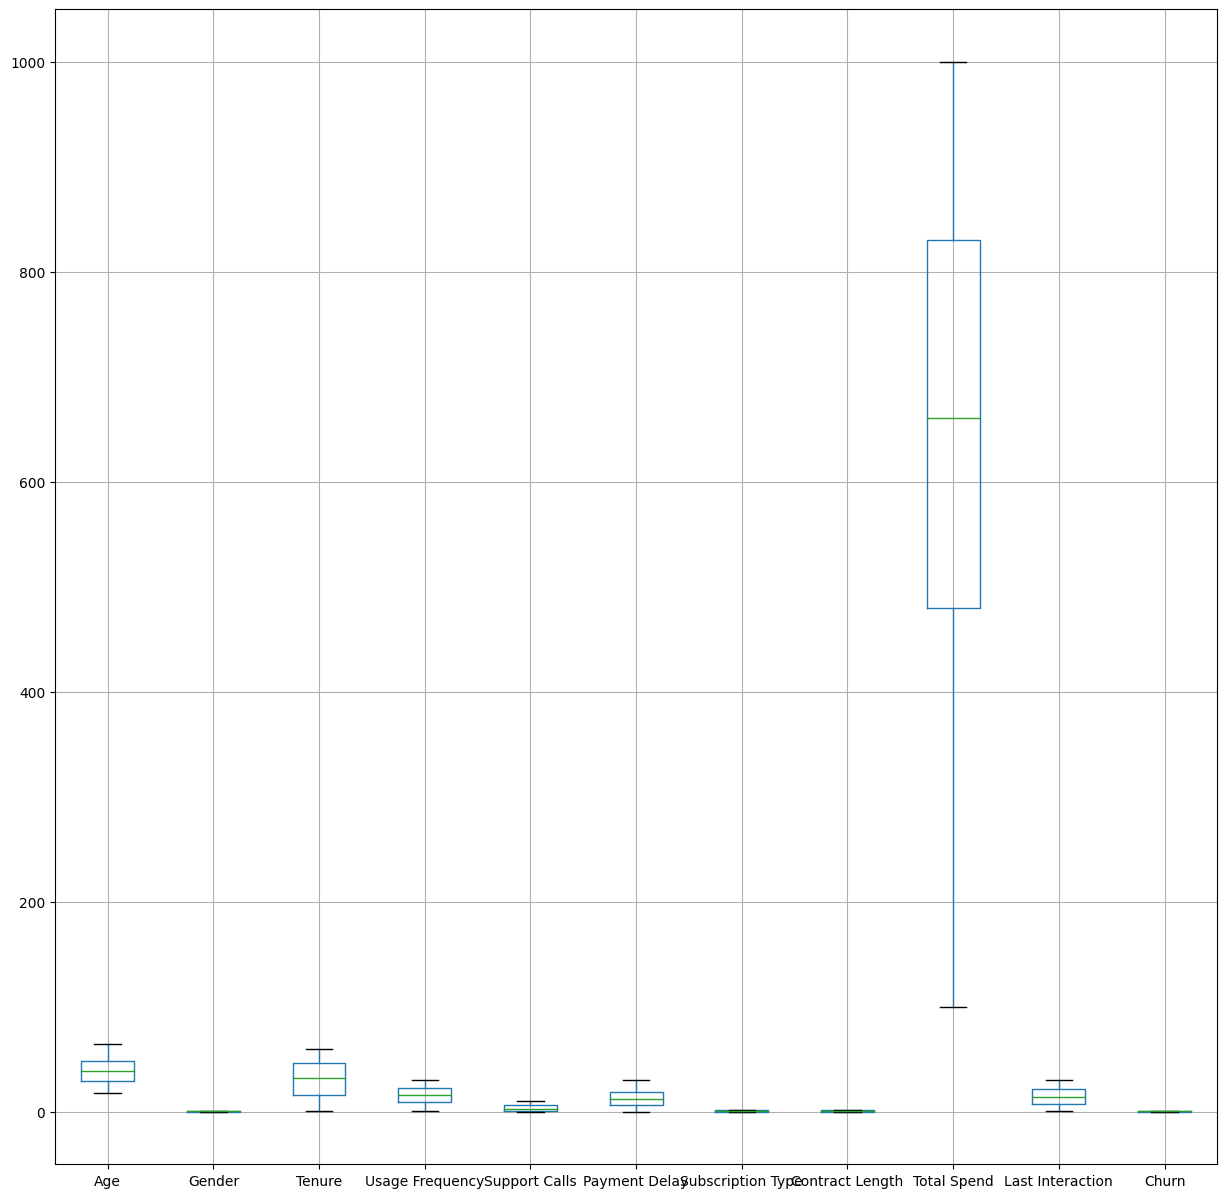

In [27]:
#outlier detection 
#box plot for visualising potential outliers
train.boxplot(figsize=(15,15))
plt.show()

There may be some outliers in 'Total Spend', we need to take this into consideration. 

This is not displayed from Johanne's codes since it's in the test set 

In [28]:
df.describe()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,39.704172,0.554770,31.350435,15.714825,3.833317,13.496843,1.012179,0.997538,620.072766,14.610581,0.555203
std,12.670577,0.496992,17.237482,8.619323,3.133603,8.451187,0.814347,0.885313,245.319256,8.608286,0.496944
min,18.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,0.000000,16.000000,8.000000,1.000000,6.000000,0.000000,0.000000,446.000000,7.000000,0.000000
50%,40.000000,1.000000,32.000000,16.000000,3.000000,13.000000,1.000000,1.000000,648.900000,14.000000,1.000000
75%,49.000000,1.000000,46.000000,23.000000,6.000000,20.000000,2.000000,2.000000,824.000000,22.000000,1.000000
max,65.000000,1.000000,60.000000,30.000000,10.000000,30.000000,2.000000,2.000000,1000.000000,30.000000,1.000000


This shows that there is a gradual increase in the 'Total Spend' variable, which indicates that there are not outliers. 
Due to this, we will not take any action in removing the "outlier" displayed in the box plot, but keep it in mind when conducting further analysis. 

### Pattern Recognition

`Correlation Matrix` 

In [62]:
#correlation matrix to see which features are highly correlated to the churn feature
corr_matrix = df.corr()
corr_matrix["Churn"].sort_values(ascending=False)

Churn                         1.000000
Support Calls                 0.516283
Contract Length_Monthly       0.366495
Payment Delay                 0.329785
Age                           0.191224
Gender_Female                 0.168989
Last Interaction              0.127150
Subscription Type_Basic       0.019107
Subscription Type_Standard   -0.007928
Subscription Type_Premium    -0.011012
Tenure                       -0.021308
Usage Frequency              -0.053263
Contract Length_Annual       -0.152712
Contract Length_Quarterly    -0.156347
Gender_Male                  -0.168989
Total Spend                  -0.369682
Name: Churn, dtype: float64

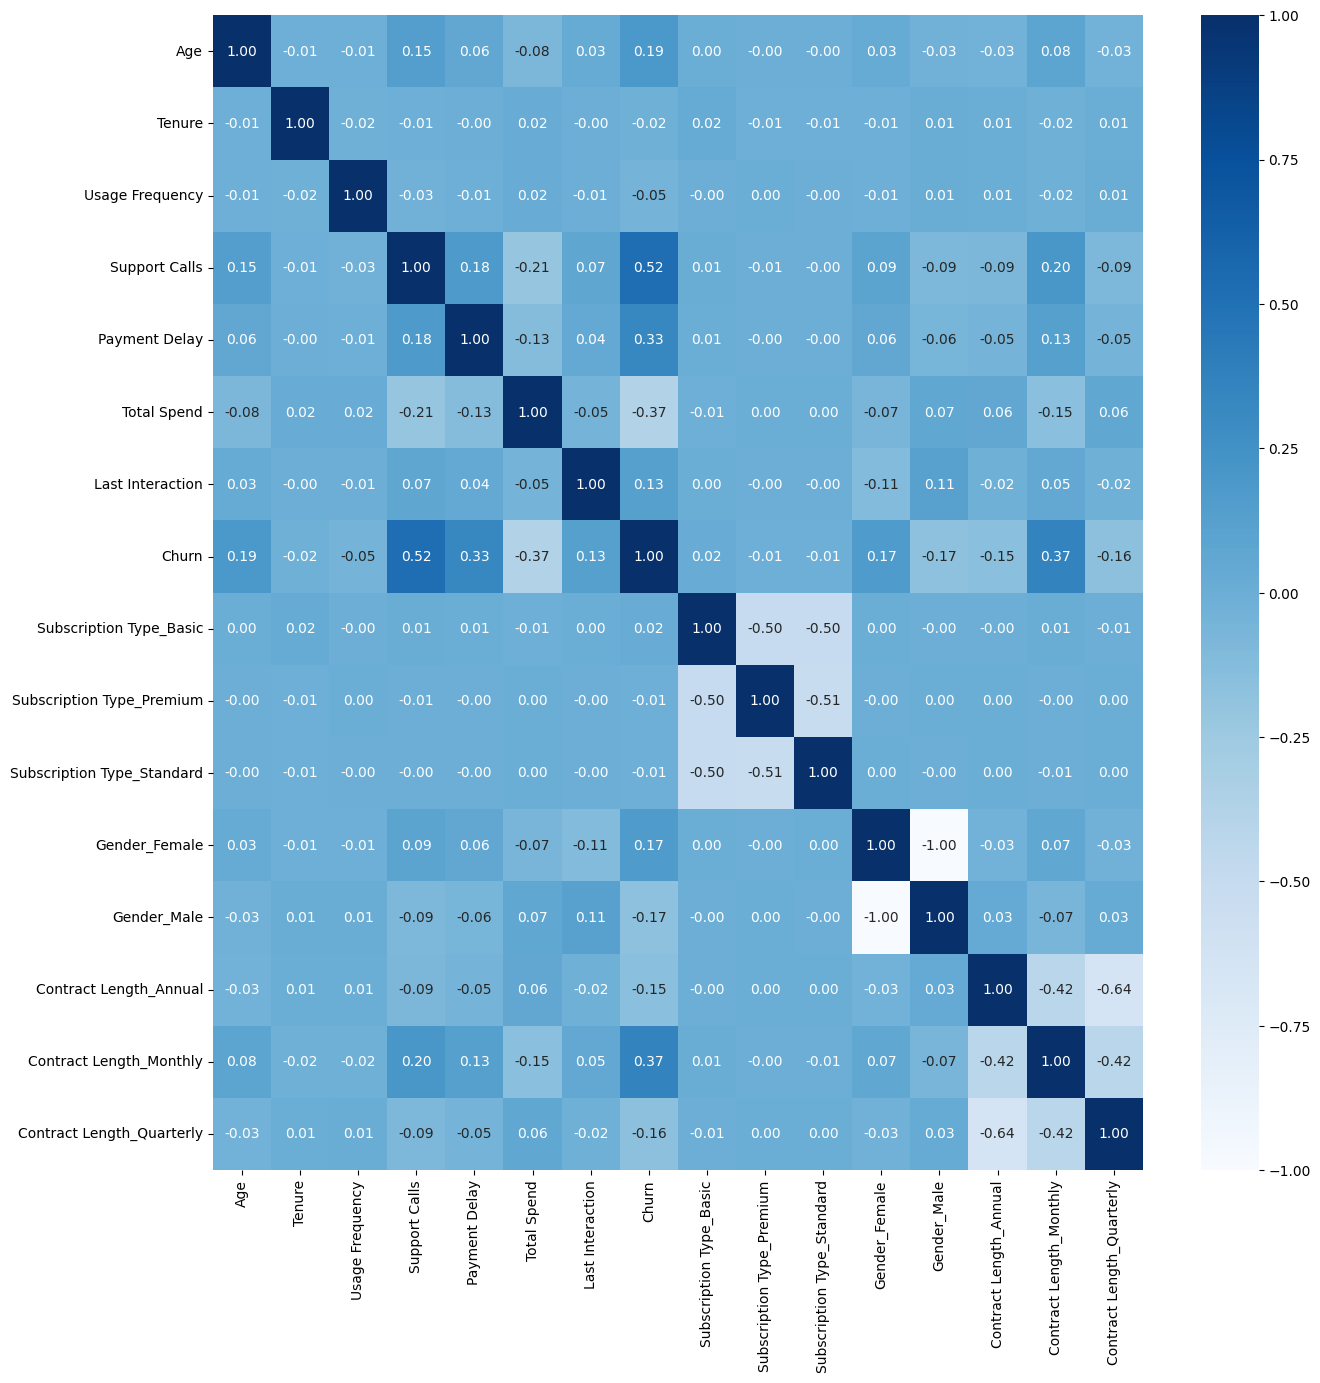

In [69]:
# Create a heatmap with blue color
decimal_places = 2
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=f'.{decimal_places}f', cmap='Blues')  # Use 'Blues' colormap for blue color
plt.show()

### Prediction

`Logistic Regression`